# Title

**Exercise: 2 - Linear Regression in Statsmodels**

# Description

The goal of this exercise is to use `statsmodels` to fit and interpret a regression model.

# Roadmap
- Read the dataset 'movies.csv' as a dataframe
- Look at the scatterplot to predict revenue from budget costs, and investigate the appropriateness of linear regression.
- Estimate the linear regression model using both `sklearn` and `statsmodels`, and compare the results.
- Compare the coefficients of the multiple regression models (with additive effects and interactive effects) with those of the simple linear regression model.
- Investigate the appropriateness of the linear regression assumptions that the probabilisitic model implies.
- Bonus Question: calculate the log-likelihood for a linear regression model!

# Hints
statmodels.OLS()
<a href="url" target="_blank">hyperlinked</a> : Fir an ordinary least squares (OLS) regression model using `statsmodels`.

statmodels.add_constant()
<a href="url" target="_blank">hyperlinked</a> : Adds a column of ones to the design matrix **X**.

LinearRegression()
<a href="url" target="_blank">hyperlinked</a> : Returns a linear regression object from the sklearn library.

LinearRegression().coef_
<a href="url" target="_blank">hyperlinked</a> : This attribute returns the coefficient(s) of the linear regression object

sklearn.fit() 
<a href="url" target="_blank">hyperlinked</a> : Fit linear model


Note: This exercise is **auto-graded and you can try multiple attempts.**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data from 'movies.csv' to a dataframe
movies = pd.read_csv('movies.csv')

In [3]:
#Take a peak at the dataset
movies.head()

,month,day,year,budget,domestic,worldwide
0,Dec,18,2009,425.0,760.507625,2783.918982
1,Dec,19,1997,200.0,659.363944,2208.208395
2,Dec,18,2015,306.0,936.662225,2058.662225
3,Jun,12,2015,215.0,652.270625,1671.713208
4,May,4,2012,225.0,623.279547,1519.479547


(a) Plot the scatterplot to predict 'domestic' revenue from the 'budget' cost of the movie.

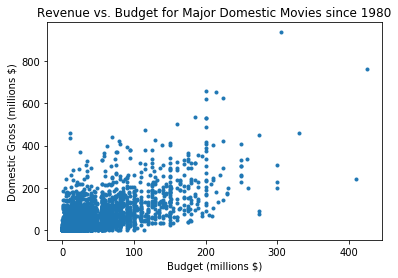

In [6]:
# create the scatterplot to predict 'domestic'
# from 'budget'
budget = movies[['budget']].values
domestic = movies['domestic'].values

plt.scatter(budget,domestic,marker='.')
plt.xlabel('Budget (millions $)')
plt.ylabel('Domestic Gross (millions $)')
plt.title('Revenue vs. Budget for Major Domestic Movies since 1980')
plt.show()

There are

**Question:** What stands out in the plots above?Does linear regression seems appropriate based on this scatterplot?  

(b) Use sklearn to get linear regression estimates.

In [7]:
### edTest(test_sklearn_regress) ###

from sklearn.linear_model import LinearRegression
regress = LinearRegression().fit(
    budget,domestic)
print(regress.coef_,regress.intercept_)

[1.11222637] 7.282264927408114


(c) Fit a linear regression model using `OLS` from `statsmodels` instead, and compare.

In [26]:
import statsmodels.api as sm

# you have to first create the X matrix with the 
# intercept included, then fit the model
X = sm.add_constant(movies['budget'])
ols1 = sm.OLS(movies['domestic'],X).fit()

ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               domestic   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     4505.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:59:59   Log-Likelihood:                -27815.
No. Observations:                5222   AIC:                         5.563e+04
Df Residuals:                    5220   BIC:                         5.565e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2823      0.875      8.322      0.000       5.567       8.998
budget         1.1122      0.017     67.117      0.000       1.080       1.145
==============================================================================
Omnibus:                     3349.953   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69300.215
Skew:                           2.727   Prob(JB):                         0.00
Kurtosis:                      19.993   Cond. No.                         67.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X = movies['budget']
ols1 = sm.OLS(movies['domestic'],X).fit()

ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               domestic   R-squared (uncentered):                   0.614
Model:                            OLS   Adj. R-squared (uncentered):              0.614
Method:                 Least Squares   F-statistic:                              8313.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                        0.00
Time:                        12:49:16   Log-Likelihood:                         -27849.
No. Observations:                5222   AIC:                                  5.570e+04
Df Residuals:                    5221   BIC:                                  5.571e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         1.1973      0.013     91.175      0.000       1.172       1.223
==============================================================================
Omnibus:                     3037.759   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57408.069
Skew:                           2.400   Prob(JB):                         0.00
Kurtosis:                      18.518   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** When would it be prefered to fit a regression model without an intercept?

(d) Fit a second OLS model (`OLS2`) with 'budget' and 'year' as predictors and compare to `OLS1`.

In [11]:
### edTest(test_ols2) ###


X = sm.add_constant(movies[['year', 'budget']])
ols2 = sm.OLS(movies['domestic'],X).fit()

ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               domestic   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     2328.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:28:01   Log-Likelihood:                -27774.
No. Observations:                5222   AIC:                         5.555e+04
Df Residuals:                    5219   BIC:                         5.557e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1016.2111    111.905      9.081      0.000     796.830    1235.592
year          -0.5042      0.056     -9.016      0.000      -0.614      -0.395
budget         1.1418      0.017     68.087      0.000       1.109       1.175
==============================================================================
Omnibus:                     3333.347   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69688.767
Skew:                           2.703   Prob(JB):                         0.00
Kurtosis:                      20.060   Cond. No.                     3.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** How does the coefficient estimate for budget compare in this multiple regression to the corresponding estimate in the simple regression model?  Why is that the case? 

(e) Fit a model with the interaction term between budget and year (first need to define it) and the 'main effects' of the 2 predictors, and interpret the results.

In [13]:
### edTest(test_interaction) ###

#create the interaction term
interaction = movies['budget'] * movies['year']
movies['interaction'] = interaction

# define the X matrix
X = sm.add_constant(movies[['budget', 'year', 'interaction']])

#fit the model 
ols3 = sm.OLS(movies['domestic'], X).fit()

ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               domestic   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1551.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:30:09   Log-Likelihood:                -27774.
No. Observations:                5222   AIC:                         5.556e+04
Df Residuals:                    5218   BIC:                         5.558e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1023.4502    125.314      8.167      0.000     777.783    1269.117
budget          0.5594      4.536      0.123      0.902      -8.333       9.452
year           -0.5078      0.063     -8.117      0.000      -0.630      -0.385
interaction     0.0003      0.002      0.128      0.898      -0.004       0.005
==============================================================================
Omnibus:                     3331.783   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69581.788
Skew:                           2.702   Prob(JB):                         0.00
Kurtosis:                      20.047   Cond. No.                     1.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** How have the estimates changed in this model compared to the earlier ones (especially for budget)?  Why is this the case?

(e) Investigate the assumptions to this linear regression model (`OLS3`) using the plots below.

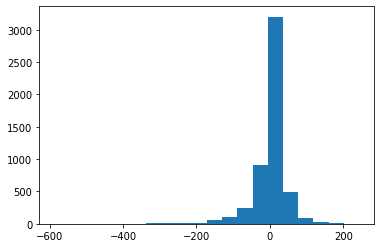

In [15]:
# define predicted values (yhat) and residuals
yhat = ols3.predict()
resid = yhat - movies['domestic']

#plot the histogram of the residuals
plt.hist(resid,bins=20)
plt.show()

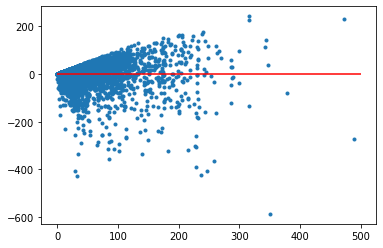

In [16]:
# residual scatterplot 
plt.scatter(yhat,resid,marker='.')
plt.hlines(0,xmin=0,xmax=500,color='red')
plt.show()

**Question:** What stands out in the plots above?

**Bonus Question:** Confirm the log-likelihood evaluation for `OLS1` (just plug in your estimates).

In [42]:
### use ols1.params,ols1.mse_resid, and norm.logpdf as your basis
from scipy.stats import norm

params = ols1.params
std_dev = np.std(ols1.resid)
y_pred = params[0] + params[1] * movies['budget']

prob = np.sum(norm.logpdf(movies['domestic'], y_pred, std_dev))
prob

-27814.79344349679